In [1]:
from pymoo.optimize import minimize
from pymoo.model.problem import Problem
from pymoo.algorithms.nsga2 import NSGA2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Primeiro caso: encontrando o mínimo local de uma função bidimensional do tipo f(x)

In [3]:
# Exemplo de função:
def f(x):
    return x**6 + 6*x**4 - 4*x + 8

In [4]:
# Definindo a classe do nosso problema:

class ProblemaBidimensional(Problem):
    def __init__(self, n_var, n_obj, xl, xu):
        super().__init__(n_var = 1, n_obj = 1, xl = xl, xu = xu)
        
    def _evaluate(self, designs, out, *arg, **kwargs):
        resultado = []
        for design in designs:
            resultado.append(f(design))
        out['F'] = np.array(resultado)

In [5]:
# Instanciando a classe do problema e definindo os parâmetros que serão utilizados na otimização:
x_min = -10.
x_max = 10.
problema_bidim = ProblemaBidimensional(n_var=1, n_obj=1, xl=[x_min], xu=[x_max])
algoritmo = NSGA2(pop_size = 100)
criterio_parada = ('n_gen', 100)

In [6]:
resultado = minimize(problem = problema_bidim, algorithm = algoritmo, termination = criterio_parada)

In [7]:
print(f"O valor de x que minimiza a função f(x) no intervalo [{x_min}, {x_max}] é: {resultado.X[-1]}")
print(f"E o valor mínimo de f(x) neste mesmo intervalo é {resultado.F[-1]}")

O valor de x que minimiza a função f(x) no intervalo [-10.0, 10.0] é: 0.5376976715209363
E o valor mínimo de f(x) neste mesmo intervalo é 6.374914692884209


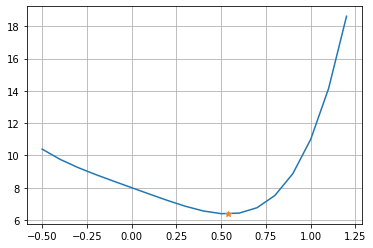

In [8]:
# Podemos plotar o gráfico para visualizar esse ponto na função:
x_arr = np.arange(-0.5, 1.3, 0.1)
plt.grid()
plt.plot(x_arr, f(x_arr))
plt.plot(resultado.X[-1], resultado.F[-1], '*')

Segundo caso: encontrando o mínimo local de funções n-dimensionais:

In [9]:
# Definimos uma função arbitrária do tipo g((x,y,z,...)):

def g(args):
    return args[0]*args[1] + args[0]**2

# Para este exemplo, g(x) = xy + x²

In [10]:
# Definindo a classe do nosso problema:

class ProblemaNDimensional(Problem):
    def __init__(self, n_var, n_obj, xl, xu):
        super().__init__(n_var = 2, n_obj = 2, xl = xl, xu = xu)
        
    def _evaluate(self, designs, out, *arg, **kwargs):
        resultado = []
        for design in designs:
            resultado.append(g(design))
        out['F'] = np.array(resultado)

In [11]:
x_min = 0.
x_max = 1.
y_min = -1.
y_max = 0.

problema_ndim = ProblemaNDimensional(n_var=2, n_obj=2, xl=[x_min, y_min], xu=[x_max, y_max])
algoritmo = NSGA2(pop_size=100)
criterio_parada = ('n_gen',100)

In [12]:
resultado = minimize(problem = problema_ndim, algorithm = algoritmo, termination = criterio_parada)

In [13]:
print(f"O valor de x e y que minimiza a função g(x,y) no intervalo [[{x_min}, {y_min}], [{x_max}, {y_max}]] é: {resultado.X[-1]}")
print(f"E o valor mínimo de g(x,y) neste mesmo intervalo é {resultado.F[-1]}")

O valor de x e y que minimiza a função g(x,y) no intervalo [[0.0, -1.0], [1.0, 0.0]] é: [ 0.49999724 -1.        ]
E o valor mínimo de g(x,y) neste mesmo intervalo é [-0.25]


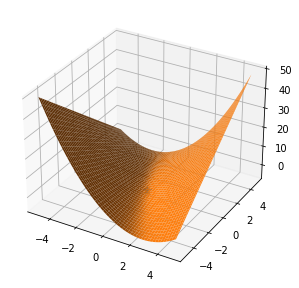

In [19]:
# Plotando o gráfico para visualizar esse ponto:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1, projection='3d')
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
x,y = np.meshgrid(x,y)
z = np.zeros(x.shape)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i,j] = g((x[i,j], y[i,j]))
ax.plot(resultado.X[0][0], resultado.X[0][1], resultado.F[0][0],'*', markersize = 8)
ax.plot_surface(x, y, z)